CIFAR 10 - Fully connected Layer Model

In [1]:
import numpy as np
import os
import tensorflow as tf


In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [4]:
print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

print(X_train.shape, X_train.dtype)

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32
(50000, 32, 32, 3) uint8



Visualization Dataset



In [5]:
def pprint(arr, pnt_cnt):
    if pnt_cnt > 0:
      print("type:{}".format(type(arr)))
    if pnt_cnt > 1:
      print("shape: {}, dimension: {}, dtype:{}".format(arr.shape, arr.ndim, arr.dtype))
    if pnt_cnt > 2:
      print("Array's Data:\n", arr)

In [6]:
pprint(X_train[0],2)

type:<class 'numpy.ndarray'>
shape: (32, 32, 3), dimension: 3, dtype:uint8


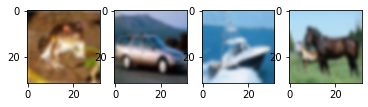

In [7]:
import matplotlib.pyplot as plt


plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [8]:
print(y_train[0], y_train[4], y_train[8], y_train[12])

[6] [1] [8] [7]


In [9]:
pprint(y_train,2)

type:<class 'numpy.ndarray'>
shape: (50000, 1), dimension: 2, dtype:uint8


Train / Validation Split

In [7]:
# model.fit 단계에서 validation_split 옵션 사용예정 

# 미사용 로직
#(X_train, X_valid) = X_train[5000:], X_train[:5000]
#(y_train, y_valid) = y_train[5000:], y_train[:5000 ]

In [10]:
print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213


X_train Data reshape (32,32,3) >> (3072,1)

In [11]:
# 입력값을 1차원 변환
# layer 구성시 flatten 사용해서 처리할 수도 있음.
X_train_1D = X_train.reshape(-1,3072)


In [12]:
pprint(X_train_1D,3)

type:<class 'numpy.ndarray'>
shape: (50000, 3072), dimension: 2, dtype:uint8
Array's Data:
 [[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [ 35 178 235 ...  12  31  50]
 [189 211 240 ... 195 190 171]
 [229 229 239 ... 163 163 161]]


label 항목 one_hot_encoding 처리
10개 클래스로 구성

In [13]:
import keras.utils

one_hot_labels = keras.utils.to_categorical(y_train, num_classes=10)

In [14]:
pprint(one_hot_labels,3)

type:<class 'numpy.ndarray'>
shape: (50000, 10), dimension: 2, dtype:float32
Array's Data:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Fully connected layer Model 만들기

https://keras.io/ko/getting-started/sequential-model-guide/

In [15]:
from keras.models import Sequential
from keras.layers import Dense , Flatten
from keras.layers.normalization import BatchNormalization
import keras.utils
from keras import layers , activations
from keras.optimizers import SGD




MODEL #1 - 입력데이터 batch normalizion 미적용

입력데이터 그대로 full connected layer로만 연결

In [16]:
model_fc1 = Sequential()

model_fc1.add(Dense(3072, activation='relu', input_dim=3072))

model_fc1.add(Dense(1024,activation='relu'))
model_fc1.add(Dense(512,activation='relu'))
model_fc1.add(Dense(256,activation='relu'))
model_fc1.add(Dense(10,activation='softmax'))

# gradient decent 추가
sgd = SGD(lr=1e-1, decay=1 )

model_fc1.compile(optimizer='sgd',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

model_fc1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3072)              9440256   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 13,245,706
Trainable params: 13,245,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_fc1.fit(X_train_1D, one_hot_labels, epochs=10, batch_size=1000, validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.0989 - val_loss: nan - val_accuracy: 0.1014
Epoch 2/10
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 3/10
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 4/10
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 5/10
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 6/10
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 7/10
40/40 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1014
Epoch 8/10
40/40 [==============================] - 1s 

In [18]:
X_test_1D = X_test.reshape(-1,3072)
one_hot_y_test = keras.utils.to_categorical(y_test, num_classes=10)

model_fc1.evaluate(X_test_1D, one_hot_y_test, batch_size=1000)

10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

MODEL #2 - 입력레이어 batchNormalization 적용

In [19]:
model_fc2 = Sequential()

# 첫번째 입력레이어 - BatchNormalization 적용
model_fc2.add(Dense(3072,input_dim=3072))
model_fc2.add(BatchNormalization())
model_fc2.add(layers.Activation(activations.relu))


model_fc2.add(Dense(1024,activation='relu'))
model_fc2.add(Dense(512,activation='relu'))
model_fc2.add(Dense(256,activation='relu'))
model_fc2.add(Dense(10,activation='softmax'))

# gradient decent 추가
sgd = SGD(lr=1e1, decay=1 )

model_fc2.compile(optimizer='sgd',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

model_fc2.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3072)              9440256   
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
activation (Activation)      (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [20]:
model_fc2.fit(X_train_1D, one_hot_labels, epochs=20, batch_size=1000, validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 1s 18ms/step - loss: 2.1100 - accuracy: 0.2451 - val_loss: 2.6112 - val_accuracy: 0.1941
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 1.8753 - accuracy: 0.3464 - val_loss: 2.0873 - val_accuracy: 0.2789
Epoch 3/20
40/40 [==============================] - 1s 15ms/step - loss: 1.7667 - accuracy: 0.3879 - val_loss: 1.8937 - val_accuracy: 0.3366
Epoch 4/20
40/40 [==============================] - 1s 15ms/step - loss: 1.6938 - accuracy: 0.4123 - val_loss: 1.7707 - val_accuracy: 0.3819
Epoch 5/20
40/40 [==============================] - 1s 15ms/step - loss: 1.6393 - accuracy: 0.4324 - val_loss: 1.7045 - val_accuracy: 0.4058
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 1.5945 - accuracy: 0.4500 - val_loss: 1.6689 - val_accuracy: 0.4169
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 1.5563 - accuracy: 0.4652 - val_loss: 1.6457 - val_accuracy: 0.4271
Epoch 8/20
40

Test Set 검증하기

In [21]:
X_test_1D = X_test.reshape(-1,3072)
one_hot_y_test = keras.utils.to_categorical(y_test, num_classes=10)

model_fc2.evaluate(X_test_1D, one_hot_y_test, batch_size=1000)

10/10 [==============================] - 0s 7ms/step - loss: 1.4668 - accuracy: 0.4863


[1.4668201208114624, 0.486299991607666]

모델 layer 분석


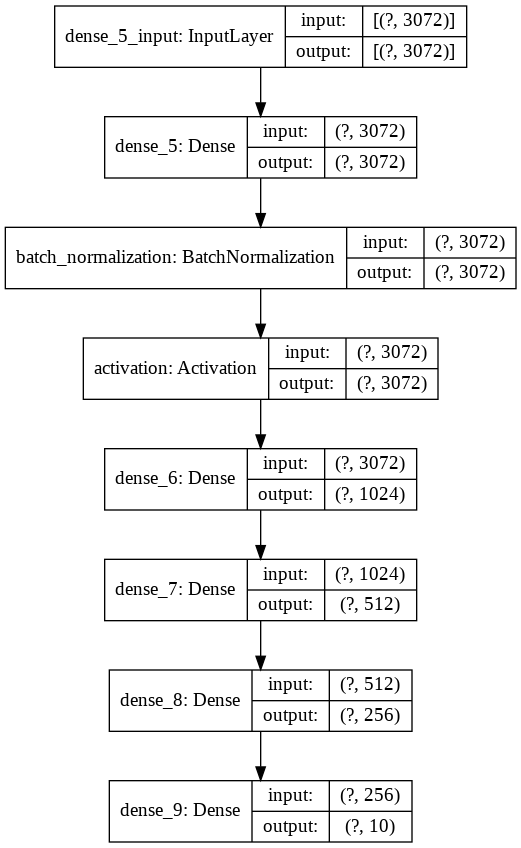

In [22]:
from keras.utils import plot_model

plot_model(model_fc2, to_file='./model.png', show_layer_names=True, show_shapes=True)

In [23]:
for layer in model_fc2.layers:
  print(layer.get_weights())

[array([[-0.02356923, -0.00958313, -0.01953031, ...,  0.01323523,
        -0.02354655,  0.00169034],
       [-0.00822147,  0.01502479,  0.0104743 , ...,  0.01323608,
         0.02453218, -0.01767026],
       [-0.01484279,  0.00030998,  0.02816054, ..., -0.02835057,
         0.00097444,  0.01226849],
       ...,
       [-0.01783483, -0.0170936 ,  0.02326149, ..., -0.00973975,
        -0.01882831, -0.01327992],
       [-0.00039587, -0.00741903, -0.02101863, ..., -0.01556014,
        -0.00991291,  0.02589784],
       [ 0.02484599, -0.01718272, -0.02442002, ...,  0.02009685,
         0.01383755,  0.00571709]], dtype=float32), array([ 9.5230491e-14, -3.4307222e-13, -4.7033915e-13, ...,
       -1.5008394e-12,  6.4852651e-14,  1.5791103e-12], dtype=float32)]
[array([1.0003123, 1.0005019, 1.0001875, ..., 1.000561 , 1.0004494,
       0.9996863], dtype=float32), array([-2.7579934e-04,  2.5843989e-04, -3.7571426e-05, ...,
        1.7653897e-03, -5.8759580e-04, -1.7874191e-03], dtype=float32), arr

In [69]:
model_fc2.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 3072),
    'dtype': 'float32',
    'name': 'dense_41_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'batch_input_shape': (None, 3072),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_41',
    'trainable': True,
    'units': 3072,
    'use_bias': True}},
  {'class_name': 'BatchNormalization',
   'config': {'axis': ListWrapper([1]),
    'beta_constraint': None,
    'beta_initializer': {'class_name': 'Zeros', 'config': {}},
    'beta_regularizer': None,
    'center': True,
    'dtype': 'float32',
    'epsilon': 0.001,
    'gamma_constrai